In [2]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# 1. 데이터 불러오기
df = pd.read_csv("CleanData.csv")  # 파일 경로에 맞게 수정

# 2. 고가 기준 설정 (상위 10%)
price_threshold = df['price'].quantile(0.9)
df['price_group'] = df['price'].apply(lambda x: 'High' if x >= price_threshold else 'Low')

# 3. 제목 길이 컬럼 생성
df['title_length'] = df['title'].astype(str).apply(len)

# 4. 수치형 변수 t-test (가격, 제목 길이)
high = df[df['price_group'] == 'High']
low = df[df['price_group'] == 'Low']

t_price = ttest_ind(high['price'], low['price'], equal_var=False)
t_title = ttest_ind(high['title_length'], low['title_length'], equal_var=False)

# 5. 범주형 변수 카이제곱 검정 (배송비 유형, 할인 여부)
shipping_ct = pd.crosstab(df['price_group'], df['shippingCostType'])
coupon_ct = pd.crosstab(df['price_group'], df['availableCoupons'])

chi_shipping = chi2_contingency(shipping_ct)
chi_coupon = chi2_contingency(coupon_ct)

# 6. 결과 출력
print("=== 고가 vs 비고가 비교 결과 ===")
print(f"[T-test] 가격 평균 차이 (p-value): {t_price.pvalue:.5f}")
print(f"[T-test] 제목 길이 차이 (p-value): {t_title.pvalue:.5f}")
print(f"[Chi-sq] 배송비 유형 분포 차이 (p-value): {chi_shipping[1]:.5f}")
print(f"[Chi-sq] 할인 여부 분포 차이 (p-value): {chi_coupon[1]:.5f}")
print(f"(고가 기준 상위 10% 가격: {price_threshold:.2f})")


=== 고가 vs 비고가 비교 결과 ===
[T-test] 가격 평균 차이 (p-value): 0.00000
[T-test] 제목 길이 차이 (p-value): 0.00000
[Chi-sq] 배송비 유형 분포 차이 (p-value): 0.00000
[Chi-sq] 할인 여부 분포 차이 (p-value): 0.00000
(고가 기준 상위 10% 가격: 99.99)


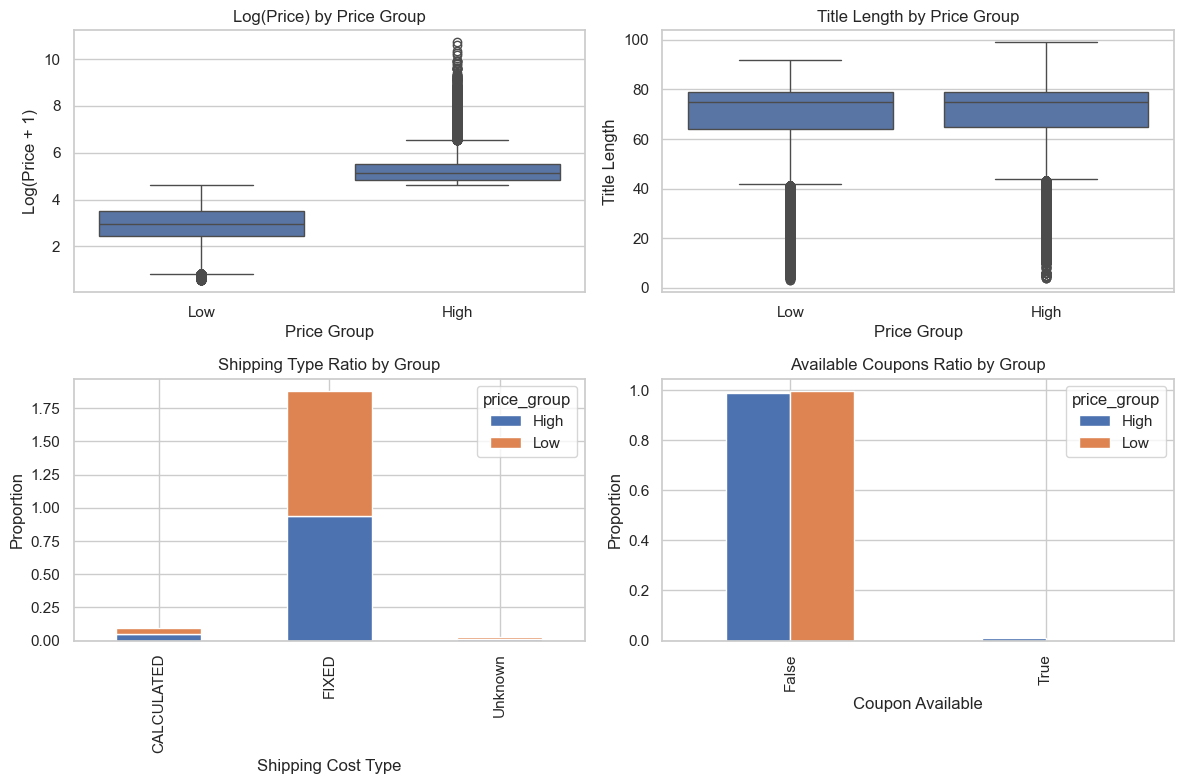

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 1. 가격 분포 (로그 스케일)
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='price_group', y=np.log1p(df['price']))
plt.title("Log(Price) by Price Group")
plt.xlabel("Price Group")
plt.ylabel("Log(Price + 1)")

# 2. 제목 길이
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='price_group', y='title_length')
plt.title("Title Length by Price Group")
plt.xlabel("Price Group")
plt.ylabel("Title Length")

# 3. 배송비 유형 분포
plt.subplot(2, 2, 3)
shipping_pct = pd.crosstab(df['shippingCostType'], df['price_group'], normalize='columns')
shipping_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Shipping Type Ratio by Group")
plt.xlabel("Shipping Cost Type")
plt.ylabel("Proportion")

# 4. 할인 여부 분포
plt.subplot(2, 2, 4)
coupon_pct = pd.crosstab(df['availableCoupons'], df['price_group'], normalize='columns')
coupon_pct.plot(kind='bar', ax=plt.gca())
plt.title("Available Coupons Ratio by Group")
plt.xlabel("Coupon Available")
plt.ylabel("Proportion")

plt.tight_layout()
plt.show()


In [3]:
df['category_1'].value_counts()

category_1
Health & Beauty                   228150
Jewelry & Watches                 111200
Clothing, Shoes & Accessories     105108
Consumer Electronics               80611
Music                              30188
Movies & TV                        28940
Books & Magazines                  28898
eBay Motors                        27994
Home & Garden                      27908
Video Games & Consoles             27273
Cameras & Photo                    26709
Computers/Tablets & Networking     25280
Collectibles                       19009
Cell Phones & Accessories          18871
Musical Instruments & Gear          8885
Crafts                              2253
Sporting Goods                      1997
Business & Industrial               1017
Toys & Hobbies                       348
Entertainment Memorabilia            195
Dolls & Bears                        172
Coins & Paper Money                   94
Sports Mem, Cards & Fan Shop          66
Pet Supplies                          57
Every

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801367 entries, 0 to 801366
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableCoupons          801367 non-null  bool   
 1   bidCount                  1148 non-null    float64
 2   buyingOptions             801367 non-null  object 
 3   categories                801367 non-null  object 
 4   condition                 801367 non-null  object 
 5   currentBidPrice           1148 non-null    object 
 6   itemCreationDate          801367 non-null  object 
 7   itemEndDate               1148 non-null    object 
 8   itemId                    801367 non-null  object 
 9   itemLocation              801367 non-null  object 
 10  itemOriginDate            801367 non-null  object 
 11  leafCategoryIds           801367 non-null  object 
 12  listingMarketplaceId      801367 non-null  object 
 13  price                     801367 non-null  f